# Machine Learning Online Class
##  Exercise 5 | Regularized Linear Regression and Bias-Variance

##  Instructions

```

%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     linearRegCostFunction.m
%     learningCurve.m
%     validationCurve.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
```

## ======== Part 1: Loading and Visualizing Data ==========

```
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [1]:
import numpy as np
import scipy.io
data = scipy.io.loadmat('ex5data1.mat')

In [2]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [3]:
m = X.shape[0]
print(m)

12


In [4]:
import matplotlib.pyplot as plt
plt.scatter(X, y, marker="x", c="r")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title("Figure 1: Data", y=-0.3)
plt.show()

<Figure size 640x480 with 1 Axes>

## ======== Part 2: Regularized Linear Regression Cost ==========
```
%  You should now implement the cost function for regularized linear 
%  regression. 
%

theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [5]:
from linearRegCostFunction import linearRegCostFunction

In [6]:
theta = np.array([[1] , [1]])
X_bias = np.concatenate((np.ones((m, 1)), X), axis=1)
J, grad = linearRegCostFunction(X_bias, y, theta, 1)

print('Cost at theta = [1 ; 1]:  ', J[0][0],'\n(this value should be about 303.993192)')

Cost at theta = [1 ; 1]:   303.9931922202643 
(this value should be about 303.993192)


## ====== Part 3: Regularized Linear Regression Gradient ======
```
%  You should now implement the gradient for regularized linear 
%  regression.
%

theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [7]:
print('Gradient at theta = [1 ; 1]: ', grad,
      '\n(this value should be about [-15.303016; 598.250744])')

Gradient at theta = [1 ; 1]:  [-15.30301567 598.25074417] 
(this value should be about [-15.303016; 598.250744])


## ======== Part 4: Train Linear Regression ==========
```
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [8]:
from trainLinearReg import trainLinearReg

In [9]:
lbd = 0
X_bias = np.concatenate((np.ones((m, 1)), X), axis=1)
theta = trainLinearReg(X_bias, y, lbd)

In [10]:
theta

array([13.08790351,  0.36777923])

In [11]:
X_bias.shape

(12, 2)

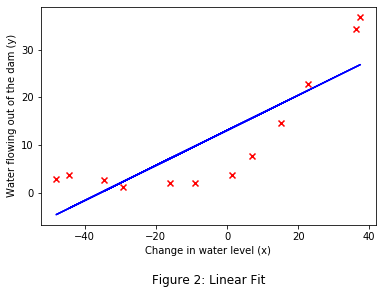

In [12]:
plt.scatter(X, y, marker="x", c="r")
plt.plot(X, X_bias.dot(theta), c="b")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title("Figure 2: Linear Fit", y=-0.3)
plt.show()

## ======== Part 5: Learning Curve for Linear Regression ==========
```
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
%

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [13]:
from learningCurve import learningCurve

In [14]:
lbd = 0
X_bias = np.concatenate((np.ones((m, 1)), X), axis=1)
X_val_bias = np.concatenate((np.ones((Xval.shape[0], 1)), Xval), axis=1)
error_train, error_val = learningCurve(X_bias, y,
                                       X_val_bias, yval,
                                       lbd)

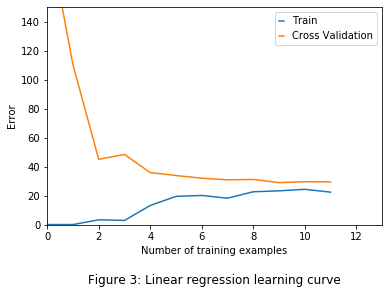

In [15]:
p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title('Figure 3: Linear regression learning curve', y =-0.3)
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
plt.show()

In [16]:
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{}\t\t{:.6f}\t{:.6f}\n'.format(i, error_train[i][0], error_val[i][0]))

# Training Examples	Train Error	Cross Validation Error

  	0		0.000000	205.121096

  	1		0.000000	110.300366

  	2		3.286595	45.010231

  	3		2.842678	48.368911

  	4		13.154049	35.865165

  	5		19.443963	33.829962

  	6		20.098522	31.970986

  	7		18.172859	30.862446

  	8		22.609405	31.135998

  	9		23.261462	28.936207

  	10		24.317250	29.551432

  	11		22.373906	29.433818



## ====== Part 6: Feature Mapping for Polynomial Regression ======
```
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

fprintf('\nProgram paused. Press enter to continue.\n');
pause;
```

In [17]:
from featureNormalize import featureNormalize
# from polyFeatures import polyFeatures

In [38]:
import numpy as np
def polyFeatures(X, p):
    """
    """
    # You need to return the following variables correctly.
    X_poly = np.zeros((len(X), p))


    X = X.reshape(-1,1)
    X_poly[:,:p] = np.power(X, np.array([range(1, p+1)]))
    
    return X_poly

In [39]:

p = 8

# Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.concatenate((np.ones((m,1)), X_poly), axis=1) # Add Ones

# # Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.concatenate((np.ones((X_poly_test.shape[0],1)), X_poly_test), axis=1) # Add Ones

# # Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.concatenate((np.ones((X_poly_val.shape[0],1)), X_poly_val), axis=1) # Add Ones

print('Normalized Training Example 1:')
print(X_poly[0, :].reshape(-1,1))

Normalized Training Example 1:
[[ 1.        ]
 [-0.3782437 ]
 [-0.78866232]
 [ 0.19032872]
 [-0.7375913 ]
 [ 0.32025197]
 [-0.6171516 ]
 [ 0.35983501]
 [-0.53109126]]


## ======= Part 7: Learning Curve for Polynomial Regression ======
```
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train,'rb', 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [39]:
lbd = 0
theta = trainLinearReg(X_poly, y, lbd)

In [40]:
theta = theta.reshape(-1,1)

In [41]:
from plotFit import plotFit

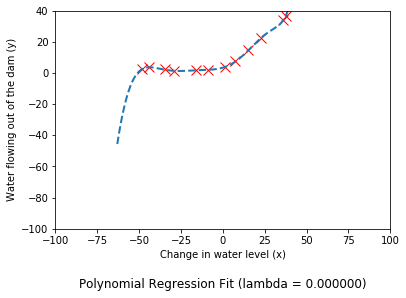

In [42]:
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(min(X), max(X), mu, sigma, theta, p)
plt.axis([-100, 100, -100, 40])
plt.xlabel('Change in water level (x)') 
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit (lambda = {:f})'.format(lbd), y=-0.3)
plt.show()

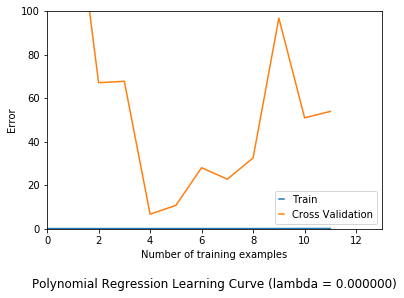

In [43]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lbd)
p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title ('Polynomial Regression Learning Curve (lambda = {:f})'.format(lbd), y=-0.3)

plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend((p1,p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5)
plt.show()

In [44]:
print('Polynomial Regression (lambda = {:f})'.format(lbd))
print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print('  \t{}\t\t{:.6f}\t{:.6f}\n'.format(i, error_train[i][0], error_val[i][0]))

Polynomial Regression (lambda = 0.000000)
# Training Examples	Train Error	Cross Validation Error

  	0		0.000000	161.442168

  	1		0.000000	160.792306

  	2		0.000000	67.085334

  	3		0.000000	67.726856

  	4		0.000000	6.617001

  	5		0.000000	10.641948

  	6		0.000000	27.990140

  	7		0.000000	22.704591

  	8		0.000258	32.498511

  	9		0.010818	96.821936

  	10		0.031219	50.932098

  	11		0.028890	53.892769



## ======== Part 8: Validation for Selecting Lambda ==========
```
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, 'rb', lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

fprintf('Program paused. Press enter to continue.\n');
pause;
```

In [45]:
def validationCurve(X, y, Xval, yval):
    # Selected values of lambda (you should not change this)
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    # You need to return these variables correctly.
    error_train = np.zeros((len(lambda_vec), 1))
    error_val = np.zeros((len(lambda_vec), 1))
    
    #      ====================== YOUR CODE HERE ======================
    #  Instructions: Fill in this function to return training errors in 
    #                error_train and the validation errors in error_val. The 
    #                vector lambda_vec contains the different lambda parameters 
    #                to use for each calculation of the errors, i.e, 
    #                error_train(i), and error_val(i) should give 
    #                you the errors obtained after training with 
    #                lambda = lambda_vec(i)
    for i in range(len(lambda_vec)):
        lbd = lambda_vec[i]
        
        theta = trainLinearReg(X, y, lbd)
        
        error_train[i] = linearRegCostFunction(X, y, theta, 0)[0] # lambda = 0
        error_val[i] = linearRegCostFunction(Xval, yval, theta, 0)[0] # lambda = 0
    
    return lambda_vec, error_train, error_val

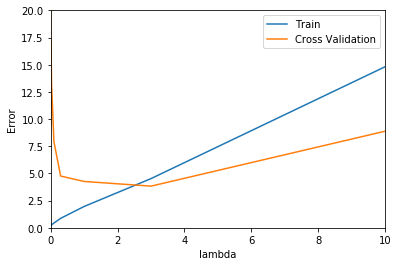

In [46]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)

p1, p2 = plt.plot(lambda_vec, error_train, lambda_vec, error_val)
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.xlabel('lambda')
plt.ylabel('Error')
plt.axis([0, 10, 0, 20])
plt.show()

In [47]:
print('lambda\t\tTrain Error\tValidation Error\n');
for i in range(len(lambda_vec)):
    print(' {}\t\t{:.6f}\t{:.6f}\n'.format(lambda_vec[i], error_train[i][0], error_val[i][0]))

lambda		Train Error	Validation Error

 0.0		0.028890	53.892769

 0.001		0.108004	9.356699

 0.003		0.166723	15.923156

 0.01		0.217958	17.149315

 0.03		0.275149	13.216183

 0.1		0.438656	7.926826

 0.3		0.868209	4.760732

 1.0		1.958697	4.263453

 3.0		4.525101	3.832184

 10.0		14.825780	8.889697

